In [1]:
%matplotlib inline

from nuscenes import NuScenes
# Load the dataset
nusc = NuScenes(version='v1.0-mini', dataroot='./data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.448 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [2]:
# View class statistics
nusc.list_lidarseg_categories(sort_by='count')

Calculating semantic point stats for nuScenes-lidarseg...
  1  animal                                   nbr_points=           0
  7  human.pedestrian.stroller                nbr_points=           0
  8  human.pedestrian.wheelchair              nbr_points=           0
 19  vehicle.emergency.ambulance              nbr_points=           0
 20  vehicle.emergency.police                 nbr_points=           0
 10  movable_object.debris                    nbr_points=          48
  6  human.pedestrian.police_officer          nbr_points=          64
  3  human.pedestrian.child                   nbr_points=         230
  4  human.pedestrian.construction_worker     nbr_points=       1,412
 14  vehicle.bicycle                          nbr_points=       1,463
 11  movable_object.pushable_pullable         nbr_points=       2,293
  5  human.pedestrian.personal_mobility       nbr_points=       4,096
 13  static_object.bicycle_rack               nbr_points=       4,476
 12  movable_object.trafficcone 

Sample 376


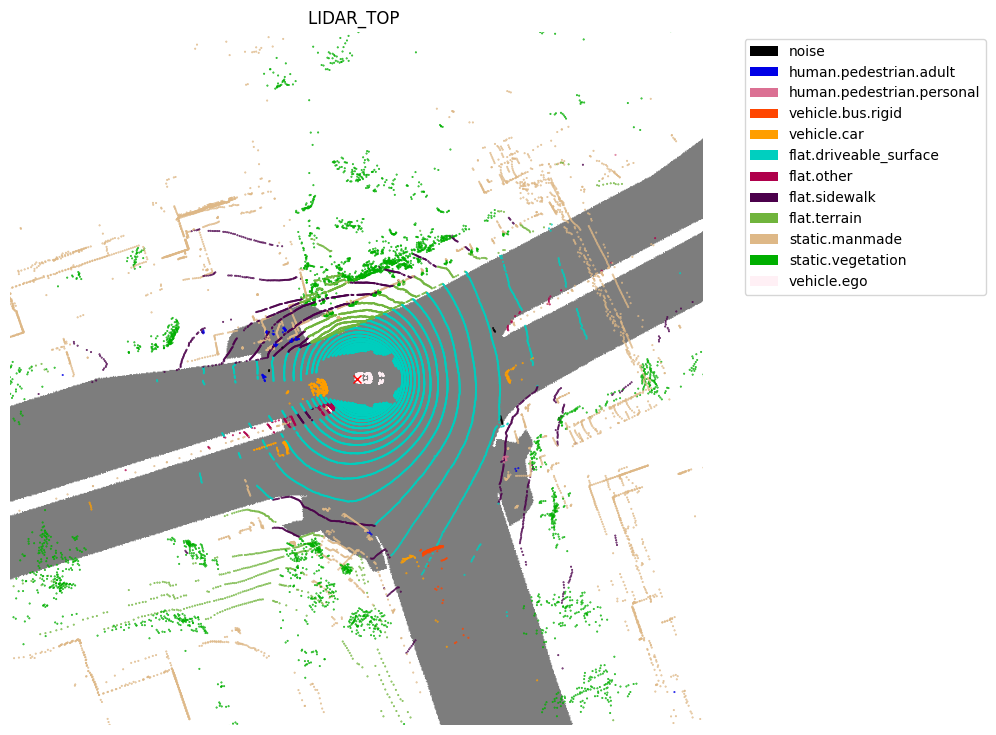

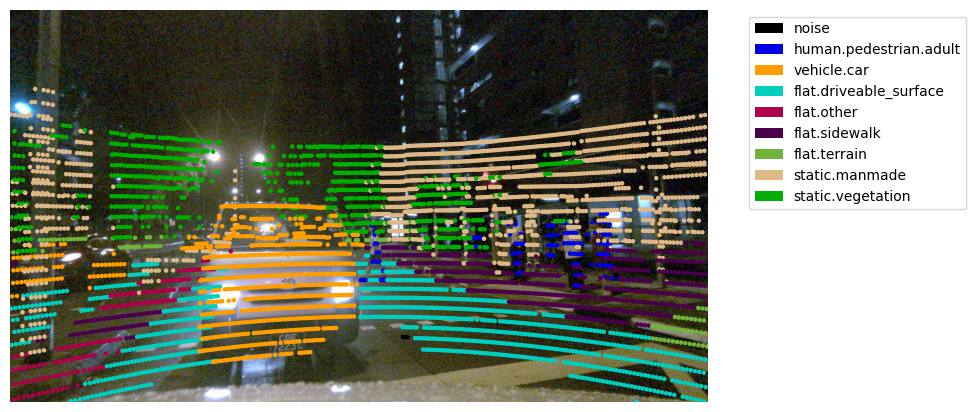

In [3]:
# Visualize a random sample
import random

sample_i = random.randint(0, len(nusc.sample) - 1)
sample = nusc.sample[sample_i]
sample_data_token = sample["data"]["LIDAR_TOP"]
print(f"Sample {sample_i}")
# A top-level view of the lidar sample
nusc.render_sample_data(
    sample_data_token, with_anns=False, show_lidarseg=True, show_lidarseg_legend=True
)
# Point-cloud fused onto the camera image using the calibrated rotation,
# translation, and scaling matrices.
nusc.render_pointcloud_in_image(
    sample["token"],
    pointsensor_channel="LIDAR_TOP",
    camera_channel="CAM_BACK",
    render_intensity=False,
    show_lidarseg=True,
    show_lidarseg_legend=True,
)


In [ ]:
import os

import numpy as np
from nuscenes.utils.data_classes import LidarPointCloud


def load_sample(sample: dict):
    """
    A helper function which takes a Nuscenes sample and loads the underlying pointcloud
    matrix X and segmentation label vector y. X is a (4, num_points) matrix, with each column
    containing (x, y, z, intensity).
    """
    sample_data_token = sample["data"]["LIDAR_TOP"]
    # load pointcloud
    ref_sd_record = nusc.get('sample_data', sample_data_token)
    pcl_path = os.path.join(nusc.dataroot, ref_sd_record['filename'])
    X = LidarPointCloud.from_file(pcl_path).points # the points
    # load labels for pointcloud
    lidarseg_labels_filename = os.path.join(
        nusc.dataroot, nusc.get("lidarseg", sample_data_token)["filename"]
    )
    y = np.fromfile(lidarseg_labels_filename, dtype=np.uint8) # the segmentation labels
    return X, y


X, y = load_sample(sample)
print(X.shape, X.dtype, y.shape, y.dtype)

Number of samples: 404
(4, 34688) float32 (34688,) uint8


In [19]:
# TODO: Fine-tune a point-cloud segmentation model to classify the class of each point.